Instituto Tecnológico de Costa Rica<br>
Escuela de Ingeniería en Electrónica<br>
Maestría en Electrónica con énfasis en Sistemas Embebidos<br>
Curso: Reconocimiento de Patrones - II Cuatrimestre 2019<br>
Profesor: MSc.Felipe Meza<br>
Estudiante: José Pablo Vernavá Amador (Carnet 200307876)<br>

# Investigación Corta 1

## Parte 1: Tutorial de *pandas* para el pre-procesado de datos

*pandas* (Python Data Analysis Library) es una biblioteca de Python para el análisis de datos. 

Es una biblioteca de código abierto y se puede usar de forma gratuita. 

Fue escrita originalmente por Wes McKinney.

Esta biblioteca provee estructuras de datos de alto rendimiento y fáciles de usar.

El poder de *pandas* radica en que es capaz de leer datos y crear un objeto de Python con filas y columnas, que es una forma más intuitiva de trabajar con un set de datos, comparado con una lista o diccionario.

*pandas* puede leer datos provenientes de un archivo CSV o TSV, o de una base de datos SQL.

Para el pre-procesado de datos utilizando *pandas*, debemos iniciar con importar la biblioteca.  La convención es que *pandas* normalmente se importa bajo el nombre  <code class="markup--code markup--p-code">pd</code>: 

In [1]:
import pandas as pd

Los datos a ser pre-procesados en *pandas* normalmente se almacenan en una estructura de datos de tipo **DataFrame**, que es una estructura de dos dimensiones (filas y columnas) que transforma los datos en una tabla.

En mi caso, soy aficionado al baloncesto, y justo ahorita se está jugando la final de la NBA entre los Golden State Warriors y los Toronto Raptors.  Entonces voy a hacer el tutorial utilizando un [set de datos de los jugadores de la NBA entre los años 1950 y 2017](https://www.kaggle.com/drgilermo/nba-players-stats/downloads/nba-players-stats.zip/2#Seasons_Stats.csv) que encontré en Kaggle.

El primer paso es cargar los datos almacenados en un archivo .csv en un DataFrame:



In [2]:
df=pd.read_csv('NBA_Seasons_Stats_1950_to_2017.csv')

Una vez con los datos cargados, podemos obtener cuantas filas y columnas hay en el set de datos:

In [3]:
df.shape

(24691, 53)

Podemos ver que hay 24691 filas y 53 columnas en la tabla.  Para ver que columnas existen:

In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

No todas las columnas son de mi interés. Además, podemos ver como se ve nuestra tabla, utilizando el comando <code class="markup--code markup--p-code">head</code> que nos muestra la parte inicial (las primeras 5 filas) de la tabla:

In [5]:
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


En su contraparte, el comando <code class="markup--code markup--p-code">tail</code> nos muestra las ultimas 5 filas de la tabla:

In [6]:
df.tail()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


Si queremos ver todo el set de datos, se usa el nombre del DataFrame donde se guardaron los datos.

Se puede observar que en los primeros años no se contabilizaban muchas de las estadísticas que se llevan actualmente, dado los *NaN* en varias de las columnas del primer año.


Las columnas que me importan van a ser las siguientes:
- Year
- Player
- Position
- Age
- Team
- Games
- Points
- Assists
- Rebounds


Entonces voy a remover las columnas extra por medio del comando <code class="markup--code markup--p-code">drop</code>:

In [7]:
df=df.drop(['Unnamed: 0', 'Tm', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'PF'],axis=1)

Para verificar que funcionó:

In [8]:
df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'G', 'TRB', 'AST', 'PTS'], dtype='object')

Para renombrar las columnas:

In [9]:
df.columns=['Year','Player','Position','Age','Games','Rebounds','Assists','Points']

In [10]:
df=df[['Year','Player','Age','Position','Games','Points','Rebounds','Assists']]

Para ver cuantos valores "NaN" hay en cada columna:

In [11]:
df.isna().sum()

Year         67
Player       67
Age          75
Position     67
Games        67
Points       67
Rebounds    379
Assists      67
dtype: int64

Observando el archivo "NBA_Seasons_Stats_1950_to_2017.csv", entre cada año hay una fila en blanco, y el archivo contiene datos para 67 años (desde 1950 hasta 2017). Voy a proceder a remover esas filas en donde la columna "Year" esté en blanco:

In [12]:
df=df.dropna(axis=0,subset=['Year'])

In [13]:
df.isna().sum()

Year          0
Player        0
Age           8
Position      0
Games         0
Points        0
Rebounds    312
Assists       0
dtype: int64

Ahora voy a remover las filas donde exista "NaN" en las columnas de "Age" y "Rebounds", para así obtener un set de datos limpio:

In [14]:
df=df.dropna(axis=0,subset=['Age'])
df=df.dropna(axis=0,subset=['Rebounds'])

Para ver los tipos de datos de las columnas se usa el comando <code class="markup--code markup--p-code">dtypes</code>:

In [15]:
df.dtypes

Year        float64
Player       object
Age         float64
Position     object
Games       float64
Points      float64
Rebounds    float64
Assists     float64
dtype: object

El tipo de dato "object" de *pandas* se usa para designar los datos con texto.  Todos los valores numéricos de la tabla los voy a tratar como enteros, ya que ninguno de los datos posee decimales, entonces para convertir el tipo de dato de una columna:

In [16]:
df['Year']=df['Year'].astype('int')
df['Age']=df['Age'].astype('int')
df['Games']=df['Games'].astype('int')
df['Points']=df['Points'].astype('int')
df['Rebounds']=df['Rebounds'].astype('int')
df['Assists']=df['Assists'].astype('int')
df.dtypes

Year         int64
Player      object
Age          int64
Position    object
Games        int64
Points       int64
Rebounds     int64
Assists      int64
dtype: object

Otro comando útil para el pre-procesado de datos, es el comando <code class="markup--code markup--p-code">describe</code>, que calcula valores estadísticos para las columnas numéricas:

In [17]:
df.describe()

,Year,Age,Games,Points,Rebounds,Assists
count,24304.000000,24304.000000,24304.000000,24304.000000,24304.000000,24304.000000
mean,1993.154049,26.671248,50.949803,512.544849,224.702642,115.310072
std,16.844271,3.851208,26.528771,494.560161,228.199009,136.462545
min,1951.000000,18.000000,1.000000,0.000000,0.000000,0.000000
25%,1981.000000,24.000000,27.000000,106.750000,51.000000,19.000000
50%,1996.000000,26.000000,58.000000,368.000000,159.000000,68.000000
75%,2007.000000,29.000000,76.000000,782.000000,322.000000,161.000000
max,2017.000000,44.000000,88.000000,4029.000000,2149.000000,1164.000000


Se observa, por ejemplo, que el máximo número de puntos anotados en una temporada por un jugador corresponde a 4029. El dueño de dicho [récord](https://en.wikipedia.org/wiki/List_of_National_Basketball_Association_annual_scoring_leaders) es Wilt Chamberlain en la temporada 1961-62.

Esta misma información la podemos obtener del DataFrame utilizando el comando <code class="markup--code markup--p-code">idmax</code>, que retorna el índice de la fila con el valor máximo de la columna especificada, junto con el comando <code class="markup--code markup--p-code">loc</code> para obtener toda la fila correspondiente:

In [18]:
df.loc[df['Points'].idxmax(),:]

Year                     1962
Player      Wilt Chamberlain*
Age                        25
Position                    C
Games                      80
Points                   4029
Rebounds                 2052
Assists                   192
Name: 1706, dtype: object

Continuemos ahora con el análisis exploratorio de los datos.

## Parte 2: Análisis exploratorio de los datos

El análisis exploratorio de datos (EDA) es un enfoque para analizar conjuntos de datos para resumir sus principales características, normalmente con métodos visuales.  El objetivo principal es visualizar lo que los datos nos pueden decir, más allá de un modelado formal o comprobar una hipótesis. 

Para realizar el EDA, se puede hacer uso de la biblioteca *matplotlib*, entonces hay que importarla:

In [19]:
import matplotlib.pyplot as plt

Analicemos el comportamiento de la cantidad de jugadores por temporada. Primero obtengo un DataSet donde una columna corresponde al año y otra columna a la cantidad de jugadores que participaron ese año, por medio del uso de los comandos <code class="markup--code markup--p-code">groupby</code>, <code class="markup--code markup--p-code">size</code> y <code class="markup--code markup--p-code">reset_index</code>

In [20]:
playersByYear=df.groupby(['Year']).size().reset_index(name='# Players')

Ahora podemos ver el comportamiento por medio de un gráfico de barras:

Text(0.5, 1.0, '# Of Players per Year')

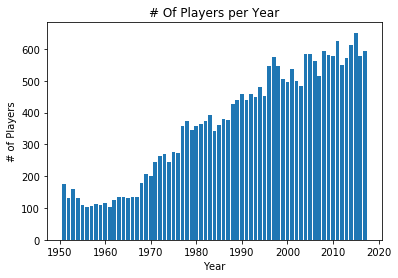

In [21]:
plt.bar(playersByYear['Year'],playersByYear['# Players'])
plt.ylabel('# of Players')
plt.xlabel('Year')
plt.title('# Of Players per Year')

Es interesante ver cómo ha aumentado el número de jugadores en la NBA, especialmente a partir de la década de los 70.

¿Cuáles son los 10 jugadores con más puntos entre 1950 y 2017 y en cuantos juegos anotaron esos puntos?

In [22]:
pointsPerPlayer=df.groupby('Player',as_index=False).agg({'Points':'sum','Games':'sum'}).sort_values(by='Points',ascending=True).tail(10)

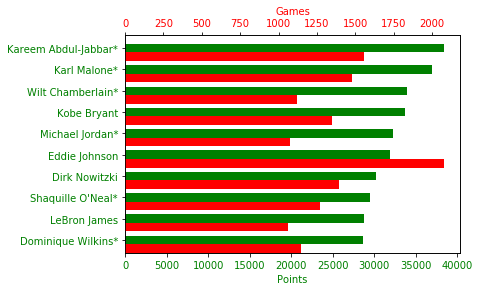

In [23]:
import numpy as np
ind=np.arange(len(pointsPerPlayer))
width=0.4
fig,ax1=plt.subplots()
color='green'
ax1.set_xlabel('Points',color=color)

ax1.barh(ind+width,pointsPerPlayer.Points,width,color='green',label='Points')
ax1.set(yticks=ind + width,yticklabels=pointsPerPlayer.Player, ylim=[2*width - 1, len(pointsPerPlayer)])
ax1.tick_params(labelcolor=color)

ax2=ax1.twiny()
color='red'
ax2.set_xlabel('Games',color=color)
ax2.barh(ind,pointsPerPlayer.Games,width,color='red',label='Games')
ax2.tick_params(labelcolor=color)
plt.show()

Michael Jordan es considerado por muchos el mejor jugador de baloncesto de la historia. Veamos sus estadísticas a través de los años:

In [24]:
mjdf=df[df.Player == 'Michael Jordan*']
mjdf

,Year,Player,Age,Position,Games,Points,Rebounds,Assists
7716,1985,Michael Jordan*,21,SG,82,2313,534,481
8094,1986,Michael Jordan*,22,SG,18,408,64,53
8469,1987,Michael Jordan*,23,SG,82,3041,430,377
8869,1988,Michael Jordan*,24,SG,82,2868,449,485
9297,1989,Michael Jordan*,25,SG,81,2633,652,650
9747,1990,Michael Jordan*,26,SG,82,2753,565,519
10212,1991,Michael Jordan*,27,SG,82,2580,492,453
10666,1992,Michael Jordan*,28,SG,80,2404,511,489
11106,1993,Michael Jordan*,29,SG,78,2541,522,428
12048,1995,Michael Jordan*,31,SG,17,457,117,90


Calculemos sus puntos, rebotes y asistencias por partido para cada temporada:

In [25]:
pd.set_option('mode.chained_assignment', None)
mjdf.loc[:,'PPG']=mjdf['Points']/mjdf['Games']
mjdf.loc[:,'RPG']=mjdf['Rebounds']/mjdf['Games']
mjdf.loc[:,'APG']=mjdf['Assists']/mjdf['Games']
mjdf

,Year,Player,Age,Position,Games,Points,Rebounds,Assists,PPG,RPG,APG
7716,1985,Michael Jordan*,21,SG,82,2313,534,481,28.207317,6.512195,5.865854
8094,1986,Michael Jordan*,22,SG,18,408,64,53,22.666667,3.555556,2.944444
8469,1987,Michael Jordan*,23,SG,82,3041,430,377,37.085366,5.243902,4.597561
8869,1988,Michael Jordan*,24,SG,82,2868,449,485,34.975610,5.475610,5.914634
9297,1989,Michael Jordan*,25,SG,81,2633,652,650,32.506173,8.049383,8.024691
9747,1990,Michael Jordan*,26,SG,82,2753,565,519,33.573171,6.890244,6.329268
10212,1991,Michael Jordan*,27,SG,82,2580,492,453,31.463415,6.000000,5.524390
10666,1992,Michael Jordan*,28,SG,80,2404,511,489,30.050000,6.387500,6.112500
11106,1993,Michael Jordan*,29,SG,78,2541,522,428,32.576923,6.692308,5.487179
12048,1995,Michael Jordan*,31,SG,17,457,117,90,26.882353,6.882353,5.294118


Ahora sí podemos proceder a graficar:

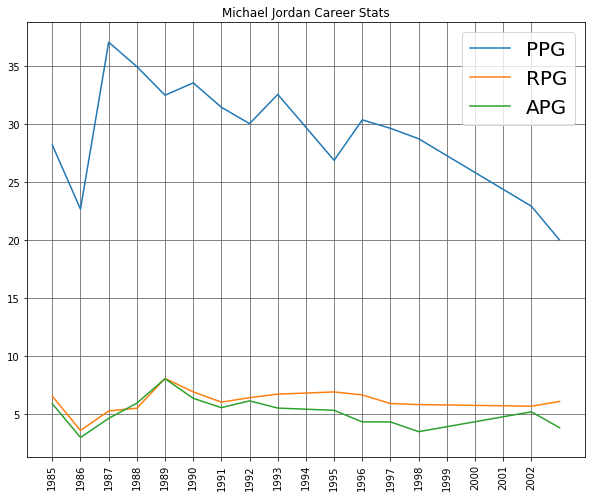

In [26]:
fig, ax1 = plt.subplots(1,figsize=(10,8))

plt.plot(mjdf['Year'],mjdf['PPG'])
plt.plot(mjdf['Year'],mjdf['RPG'])
plt.plot(mjdf['Year'],mjdf['APG'])
plt.xticks(range(mjdf['Year'].min(),mjdf['Year'].max()),rotation=90)
plt.legend(['PPG','RPG','APG'], loc='upper right',prop={'size': 20})
plt.title('Michael Jordan Career Stats')
# Show the grid lines as dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()